# 1장 서울시 구별 CCTV 현황 분석
이제 첫 작업입니다. 설레는 마음을 잠시 누르면서 먼저 목표에 대해 이야기하겠습니다. 이번 1장에서는 서울시 구별 CCTV 현황을 분석합니다. 단순히 어디에 CCTV가 많이 설치됐는지부터 시작해서 구별 인구 대비 비율을 확인하는 것까지 진행합니다. 특히 인구 현황을 보면서 구별 인구 현황에 대해서도 확인해볼까 합니다.  그리고 구별 CCTV 현환을 시각화하는 부분도 이야기하려고 합니다. 그리고 이런 과정을 거치면서 이 책이 여러분에게 바라는 것은 1장을 학습하면서 파이썬의 기초를 학습하고, pandas와 Matplotlib의 기초에 대해서도 익히기를 기대하고 있습니다.

## 1-2 파이썬에서 텍스트 파일과 엑셀 파일 읽기 - pandas

1-1절에서 우리는 CSV파일과 엑셀 파일을 하나씩 얻었습니다. 파이썬에서는 이런 종류의 파일을 아주 손쉽게 읽을 수 있는 모듈이 있습니다. 바로 pandas라는 모듈입니다. Anaconda에서는 기본으로 설치되므로 그냥 사용하면 됩니다.

In [1]:
import pandas as pd

아마 앞으로도 위 코드처럼 대부분의 시작은 import로 하게 도딜 겁니다. 파이썬에서 원하는 모듈을 불러오는 명령이 import입니다. 그 뒤에 원하는 모듈명을 넣게 됩니다. 모듈명 다음의 as는 as 뒤에 붙는 pd라는 짧은 단어로 pandas를 대체하겠다는 뜻입니다. 즉,pandas의 read_csv라는 의미로 pandas.read_csv라고 하지 않고 pd.read_csv라고 쓰겠다는 의미입니다.<br>
pandas에서 CSV 파일을 읽는 명령은 read_csv입니다. 그 안에 한글을 사용하는 경우는 인코딩에서 신경 써야 합니다. 우리가 받은 CCTV 데이터는 UTF-8로 인코딩 되어 있어서 read_csv 명령을 쓸 때 encoding옵션에 UTF-8이라고 지정합니다. 이때 사용되는 head() 명령은 pandas 데이터의 첫 5행만 보여달라는 것입니다.

In [2]:
CCTV_Seoul = pd.read_csv('data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


pandas 데이터는 제일 첫 줄에 보이는 것이 해당하는 열(column)을 대표하는 일종의 제목입니다. 그래서 첫 줄을 특별히 column이라고 합니다. 데이터 뒤에 columns라고 하면 column의 이름들이 반환됩니다.

In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

그런데 기관명이라고 되어 있으니 이를'구별'이라는 이름으로 하겠습니다 이렇게 이름을 바꾸는 명령은 rename이라고 합니다. 그리고 그 명령 안에 사용된 inplace=True는 실제 CCTV_Seoul이라는 변수의 내용을 갱신하라는 의미입니다.

In [5]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


이제 두 번째 받은 엑셀 파일을 읽어야 합니다. 그 명령은 read_excel입니다. 그냥 인코딩만 지정하고 읽었더니 약간 이상합니다. 그것은 원본 엑셀 파일이 그림 1-8에서 보는 것처럼 첫 세줄이 열의 제목 처럼 되어 있기 때문입니다.

In [6]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


그래서 엑셀 파일을 읽을 때는 옵션을 좀 더 많이 적용하도록 하겠습니다. 일단 엑셀을 읽는 read_excel 명령 안에서 세 번째 줄부터 읽으라는 header=2라는 옵션을 걸고, B,D,G,J,N 열만 읽도록 parse_cols='B,D,G,J,N'이라는 옵션을 넣었습니다.

In [7]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B, D, G, J, N' )

pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


출력된 모습도 간결하게 되었습니다. 그러나 컬럼의 이름에 문제가 있는 듯합니다. rename 명령을 사용해서 컬럼의 이름을 변경합니다.

In [8]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별',
                          pop_Seoul.columns[1] : '인구수',
                          pop_Seoul.columns[2] : '한국인',
                          pop_Seoul.columns[3] : '외국인',
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


이제 어느 정도 정리된 것 같습니다. CCTV_Seoul이라는 변수에는 '구별 CCTV 현황'을, pop_Seoul이라는 변수에는'구별 인구 현황'을 저장했습니다. pandas에서 몇 줄 입력하지 않았는데 우리는 두 종류의 파일을 보기 좋게 읽게 되었습니다.

## 1-3 pandas 기초 익히기
이 책의 목적을 이루는 과정을 더 중요하게 다루지만 그래도 책 전반에 걸쳐 pandas의 사용 빈도가 높아서 기초를 익히고 지나가겠습니다. 빠르게 진행할 테니 집중하세요. 그리고 본 절의 튜토리얼은 pandas의 튜토리얼이 다수 포함되어 있습니다.

In [9]:
import pandas as pd
import numpy as np

pandas와 Numpy를 import 했습니다. 이 두 모듈은 자주 사용되는 모듈이면서 둘을 함께 쓰면 유용할 때가 많습니다.

In [10]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

pandas의 데이터 유형 중 기초가 되는 것이 Series입니다. 대괄호로 만드는 파이썬의 list 데이터로 만들 수 있습니다. 중간에 NaN(Not A Number)도 넣었습니다.

In [11]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

또 pandas에는 날짜형의 데이터인 date_range가 있습니다. 기본 날짜를 지정하고 periods 옵션으로 6일간이라고 지정합니다.

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])

df

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-04,-0.105814,0.842264,0.314663,0.122205
2013-01-05,0.479283,-0.228043,1.032146,0.295069
2013-01-06,0.249844,1.256986,0.243343,-2.025252


이제 DataFrame 유형의 데이터를 만듭니다. 6행4열의 random 변수를 만들고, 컬럼에는 columns=['A','B','C','D']로 지정하고, index 명령으로 코드[11]에서 만든 날짜형 데이터인 dates를 index=dates 옵션을 이용해서 지정했습니다.

In [13]:
df.head(3)

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661


head() 명령을 사용하면 기본적으로 첫5행을 보여줍니다. 괄호 안에 숫자를 넣어두면 그 숫자만큼의 행을 볼 수 있습니다.

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

그리고 index, columns 명령을 이용하면 pandas의 DataFrame의 컬럼과 인덱스를 확인할 수 있습니다.

In [16]:
df.values

array([[ 0.48716695, -1.00898643, -1.45222482,  0.51865227],
       [ 0.03700647, -0.86697078,  1.57847609, -0.05784158],
       [ 0.63137738, -0.25739179,  1.85534022,  1.88866061],
       [-0.10581404,  0.84226383,  0.31466259,  0.12220534],
       [ 0.47928304, -0.22804338,  1.0321463 ,  0.29506884],
       [ 0.24984422,  1.25698615,  0.24334286, -2.02525201]])

그리고 그 안에 들어가는 내용은 values 명령으로 확인할 수 있습니다. 또, info()명령을 사용하면 DataFrame의 개요를 알 수 있습니다.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


describe() 명령을 사용하면 통계적 개요를 확인할 수 있습니다. 코드[19]에서처럼 개수 (count)와 평균(mean)뿐만 아니라 min.max와 각 1/4 지점, 표준편차까지 한 번에 알 수 있습니다.

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.296477,-0.043690,0.595291,0.123582
std,0.287498,0.912789,1.195003,1.261063
min,-0.105814,-1.008986,-1.452225,-2.025252
25%,0.090216,-0.714576,0.261173,-0.012830
50%,0.364564,-0.242718,0.673404,0.208637
75%,0.485196,0.574687,1.441894,0.462756
max,0.631377,1.256986,1.855340,1.888661


이때 values가 숫자가 아니라 문자라고 핟더라도 그에 맞는 개요가 나타납니다.

In [19]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-06,0.249844,1.256986,0.243343,-2.025252
2013-01-04,-0.105814,0.842264,0.314663,0.122205
2013-01-05,0.479283,-0.228043,1.032146,0.295069
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-01,0.487167,-1.008986,-1.452225,0.518652


sort_values 명령은 by로 지정된 컬럼을 기준으로 정렬합니다. ascending 옵션을 사용하면 내림차순이나 오름차순으로 정렬시킬 수 있습니다.

In [20]:
df

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-04,-0.105814,0.842264,0.314663,0.122205
2013-01-05,0.479283,-0.228043,1.032146,0.295069
2013-01-06,0.249844,1.256986,0.243343,-2.025252


그냥 변수명을 적고 실행하면 그 내용이 나타납니다. 내용이 너무 많은 경우는 Jupyter Notebook에서 내용을 줄여서 보여줍니다.

In [21]:
df['A']

2013-01-01    0.487167
2013-01-02    0.037006
2013-01-03    0.631377
2013-01-04   -0.105814
2013-01-05    0.479283
2013-01-06    0.249844
Freq: D, Name: A, dtype: float64

DataFrame으로 선언된 변수의 경우 변수명 뒤에 ['A']와 같이 붙여주면 해당 컬럼만 Series로 보여줍니다. 물론 head()라는 명령이 있지만 중간부터 보고 싶다면 행의 범위만 지정해서 df[0:3]이라고 하면 됩니다.

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661


만약 2013.01.02부터 2013.01.04까지의 행을 보고 싶다면 df['20130102':'20130104']라고 하면 됩니다.

In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-04,-0.105814,0.842264,0.314663,0.122205


코드 [11]에서 만든 dates 변수를 이용해서 특정 날짜의 데이터만 보고 싶으면 df.loc명령을 사용하면 됩니다. loc는 location 옵션으로 슬라이싱(우리가 지금 하고 있는 겁니다.)할 때 loc 옵션을 이용해서 위치 값을 지정할 수 있습니다.

In [24]:
df.loc[dates[0]]

A    0.487167
B   -1.008986
C   -1.452225
D    0.518652
Name: 2013-01-01 00:00:00, dtype: float64

A,B열의 모든 행을 보고 싶다면 df.loc[:,['A','B']]라고 하면 됩니다.

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.487167,-1.008986
2013-01-02,0.037006,-0.866971
2013-01-03,0.631377,-0.257392
2013-01-04,-0.105814,0.842264
2013-01-05,0.479283,-0.228043
2013-01-06,0.249844,1.256986


물론 행과 열의 범위를 모두 지정할 수도 있습니다.

In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.037006,-0.866971
2013-01-03,0.631377,-0.257392
2013-01-04,-0.105814,0.842264


2013년 1월 2일부터 2013년 1월 4일까지의 데이터 중 A와 B 컬럼의 데이터만 선택하는 것입니다.

In [27]:
df.loc['20130102',['A','B']]

A    0.037006
B   -0.866971
Name: 2013-01-02 00:00:00, dtype: float64

또, 2013년 1월 2일의 A,B 컬럼의 내용을 확인하는 것입니다.

In [28]:
df.loc[dates[0],'A']

0.4871669485819013

그리고 코드[11]에 있는 dates[0]에 맞는 날짜인 2013년 1월1일에 A컬럼의 데이터만 확인할 수 있습니다. 그러나 loc 명령과 달리 행과 열의 번호를 이용해서 데이터에 바로 접근하고 싶을 수 있는데, 그 명령이 iloc입니다. <br>
iloc을 사용하면 행이나 열의 범위를 지정하면 됩니다. 특히 콜론(:)을 사용하면 전체를 의미합니다.

In [29]:
df.iloc[3]

A   -0.105814
B    0.842264
C    0.314663
D    0.122205
Name: 2013-01-04 00:00:00, dtype: float64

먼저 iloc에 단지 숫자만 표시하면 3번 행을 의미합니다. (0번부터 시작하니까 4번 행이 됩니다.)

In [30]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.105814,0.842264
2013-01-05,0.479283,-0.228043


또 3번째부터 5번째 앞, 즉 3번째부터 4번째까지 행과 0번부터 1번까지 열의 데이터만 가져올 수 있습니다.

In [31]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.037006,1.578476
2013-01-03,0.631377,1.855340
2013-01-05,0.479283,1.032146


또 번위가 아니라(,)로 행이나 열을 지정해서 데이터를 가져올 수 있습니다. 행이나 열에 대해 한쪽은 전체를 의미하게 하고 싶을 때는 그냥 콜론만 사용하변 됩니다.

In [32]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661


이렇게 행은 범위를 주고, 열은 콜론으로 전체를 의미하게 하는 것입니다.

In [33]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.008986,-1.452225
2013-01-02,-0.866971,1.578476
2013-01-03,-0.257392,1.855340
2013-01-04,0.842264,0.314663
2013-01-05,-0.228043,1.032146
2013-01-06,1.256986,0.243343


반대로 행을 전체로 선택했습니다. 다시 df를 호출하겠습니다.

In [34]:
df

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-04,-0.105814,0.842264,0.314663,0.122205
2013-01-05,0.479283,-0.228043,1.032146,0.295069
2013-01-06,0.249844,1.256986,0.243343,-2.025252


DataFrame에서 특정 조건을 만족하는 데이터만 얻을 수 있습니다. 컬럼을 지정할 때 df['A']처럼 할 수도 있고, df.A와 같이 할 수도 있습니다. 컬럼A에서 0보다 큰 행만 얻는 것입니다.

In [35]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-05,0.479283,-0.228043,1.032146,0.295069
2013-01-06,0.249844,1.256986,0.243343,-2.025252


데이터 전체에서 조건을 걸면 만족하지 않은 곳은 NaN 처리가 됩니다.

In [36]:
df[df > 0]

,A,B,C,D
2013-01-01,0.487167,NaN,NaN,0.518652
2013-01-02,0.037006,NaN,1.578476,NaN
2013-01-03,0.631377,NaN,1.855340,1.888661
2013-01-04,NaN,0.842264,0.314663,0.122205
2013-01-05,0.479283,NaN,1.032146,0.295069
2013-01-06,0.249844,1.256986,0.243343,NaN


DataFrame을 복사할 때는 그냥 = 기호를 이용해서 복사하면 실제 데이터의 내용이 복사되는 것이 아니라 데이터 위치만 복사되기 때문에 원본 데이터는 하나만 있게 됩니다.

In [37]:
df2 = df.copy()

데이터의 내용까지 복사하라는 지령은 copy() 옵션을 붙여 넣으면 됩니다.

In [38]:
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.487167,-1.008986,-1.452225,0.518652,one
2013-01-02,0.037006,-0.866971,1.578476,-0.057842,one
2013-01-03,0.631377,-0.257392,1.855340,1.888661,two
2013-01-04,-0.105814,0.842264,0.314663,0.122205,three
2013-01-05,0.479283,-0.228043,1.032146,0.295069,four
2013-01-06,0.249844,1.256986,0.243343,-2.025252,three


원래 있는 DataFrame에서 새로운 컬럼을 추가하는 것은 코드[39]에서처럼 하면 됩니다.

In [39]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

이렇게 만든 E컬럼에서 two와 four가 있는지 조건을 걸고 싶을 때는 isin 명령을 쓰면 좋습니다.

In [40]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.631377,-0.257392,1.855340,1.888661,two
2013-01-05,0.479283,-0.228043,1.032146,0.295069,four


그 결과는 True/False로 반환되는데, 이것을 이용하면 조건에 맞는 데이터를 선택할 수 있습니다.

In [41]:
df

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.037006,-0.866971,1.578476,-0.057842
2013-01-03,0.631377,-0.257392,1.855340,1.888661
2013-01-04,-0.105814,0.842264,0.314663,0.122205
2013-01-05,0.479283,-0.228043,1.032146,0.295069
2013-01-06,0.249844,1.256986,0.243343,-2.025252


df 변수에서 좀 더 통계 느낌의 데이터를 볼 때는 특정 함수를 적용시키면 좋습니다. 이때 사용하는 것이 apply 명령입니다. 누적합을 알고 싶을 때는 numpy의 cumsum을 이용하면 됩니다.

In [42]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.487167,-1.008986,-1.452225,0.518652
2013-01-02,0.524173,-1.875957,0.126251,0.460811
2013-01-03,1.155551,-2.133349,1.981591,2.349471
2013-01-04,1.049737,-1.291085,2.296254,2.471677
2013-01-05,1.529020,-1.519129,3.328400,2.766745
2013-01-06,1.778864,-0.262142,3.571743,0.741493


특별히 최대값과 최소값의 차이(혹은 거리)를 알고 싶다면 one-line 함수인 lambda를 이용할 수도 있습니다.

In [43]:
df.apply(lambda x: x.max() - x.min())

A    0.737191
B    2.265973
C    3.307565
D    3.913913
dtype: float64

## 1-4 pandas 이용해서 CCTV와 인구 현황 데이터 파악하기
이제 기초가 되는 pandas도 익혔으니 두 데이터를 정리해보겠습니다.

In [44]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


구별 CCTV 데이터에서 CCTV 전체 개수인 소계로 정렬하겠습니다.

In [45]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


CCTV의 전체 개수가 가장 작은 구는'도봉구','마포구','송파구','중량구','중구'라는 것을 알 수 있습니다. 의아스러운 것은 강남 3구중 하나인 송파구가 CCTV가 가장 적은 구 중하나라는 것인데, 2장에서 보면 송파구는 범죄율이 결코 낮은 구가 아닙니다. 그런데 CCTV가 적은 구 중에 하나입니다.

In [46]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


그리고 CCTV가 가장 많은 구는'강남구','양천구','서초구','은평구','용산구'로 나타납니다. 특히 2014년부터 2016년까지 최근 3년간 CCTV 수를 더하고 2013년 이전 CCTV수로 나눠서 최근 3년간 CCTV증가율을 계산하겠습니다.

In [47]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                            CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100 
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


그 결과를 보면 최근 3년간 CCTV가 그 이전 대비 많이 증가한 구는 '종로구','도봉구','마포구','노원구','강동구'라는 것도 알 수 있습니다. 이제 서울시 인구 현황을 정리해 보겠습니다.

In [48]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


먼저 pop_Seoul 변수를 확인했더니 0번 행에 합계가 보입니다. 아마 서울시 전체 합계를 넣어둔 것같은데 우리에게는 필요가 없습니다. 이럴 때는 행을 지우는 drop 명령을 사용해서 지우도록 합니다.

In [49]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


그리고 pop_Seoul 데이터의 '구별'컬럼의 unique를 조사합니다. 유니크 조사는 반복된 데이터는 하나로 나타내서 한 번 이상 나타난 데이터를 확인하는 것입니다.

In [50]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

이렇게 유니크 조사를 했더니 제일 끝에 Nan이 보입니다. NaN이 어디에 있는지 확인하기 위해서는 조건문을 사용해야 합니다. isnull 명령으로 NaN 데이터를 추출할 수 있습니다.

In [51]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


행을 지우는 drop 명령으로 NaN이 있던 행을 삭제합니다.

In [52]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


이제 각 구별 전체 인구를 이용해서 구별'외국인비율'과'고령자비율'을 계산하겠습니다.

In [53]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


인구수로 정렬했더니 '송파구','강서구','강남구','노원구','관악구'순으로 인구가 많습니다.

In [54]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [55]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [56]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


외국인 숫자가 많은 구는 '영등포','구로구','금천구','관악구,'동대문구'입니다만, 외국인 비율이 높은 구는 '영등포','금천구','구로구','중구','용산구'로 조금 바뀌는 것을 알 수 있습니다.

In [57]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [58]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


이제 고령자와 고령자 비율을 조사해보겠습니다. 고령자가 많은 구는'강서구','송파구','은평구','노원구','관악구'입니다만, 고령자 비율이 높은 구는'강북구','종로구','중구','용산구','서대문구'로 차이가 좀 납니다. 아무튼 이렇게 비록 한정된 내용이지만 뭔가 데이터들을 확인했습니다. 지금까지 확인한 내용도 중요하지만 여전히 우리는 CCTV의 현황을 완전히 파악한 것 같지는 않습니다. 인구 대비 CCTV 현황같은 내용을 확인하고 싶은데, 그러기 위해서는 두 데이터를 병합해야 합니다.

## 1-5 pandas 고급기능 - 두 DataFrame 병합하기
진도를 나가기 전에 pandas의 고급 기능 중 하나를 알고 가면 좋을 것 같습니다.

In [59]:
df1 = pd.DataFrame({'A': ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3'],
                    'C': ['C0','C1','C2','C3'],
                    'D': ['D0','D1','D2','D3']},
                    index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4','A5','A6','A7'],
                    'B': ['B4','B5','B6','B7'],
                    'C': ['C4','C5','C6','C7'],
                    'D': ['D4','D5','D6','D7']},
                    index=[4, 5, 6, 7])
df3 = pd.DataFrame({'A': ['A8','A9','A10','A11'],
                    'B': ['B8','B9','B10','B11'],
                    'C': ['C8','C9','C10','C11'],
                    'D': ['D8','D9','D10','D11']},
                    index=[8, 9, 10, 11])

연습용 데이터를 3개 만들겠습니다.

In [60]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [61]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [62]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


이렇게 만든 데이터를 열 방향으로 단순히 합치는 것은 concat명령입니다.

In [63]:
result = pd.concat([df1,df2,df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


단순하게 아무 옵션 없이 그냥 사용하면 열 방향으로 병합합니다.

In [64]:
result = pd.concat([df1,df2,df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

특별히 soncat 명령에 keys 옵션으로 구분할 수 있습니다. 이렇게 key 지정된 구분은 다중 index가 되어서 level을 형성합니다. 이를 확인하면,

In [65]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [66]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [67]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

입니다.

In [68]:
df4 = pd.DataFrame({'B': ['B2','B3','B6','B7'],
                    'D': ['D2','D3','D6','D7'],
                    'F': ['F2','F3','F6','F7']},
                    index=[2,3,6,7])
result = pd.concat([df1,df4], axis=1)

이렇게 만든 df4와 df1을,

In [69]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [70]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


옵션인 axis=1을 주어서 concat시켜보면,

In [71]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


이런 결과를 얻게 됩니다. df1의 index가 0,1,2,3이고, df4의 index가 2,3,6,7인데 concar 명령은 index를 기준으로 데이터를 합치기 때문입니다. 그래서 값을 가질 수 없는 곳에서 NaN이 저장됩니다. 이때 공통된 index로 합치고 공통되지 않은 index의 데이터는 버리도록 하는 옵션이 join='inner'옵션입니다.

In [72]:
result = pd.concat([df1,df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


또 join_axes[df1.index] 옵션으로 df1의 인덱스에 맞추도록 할 수도 있습니다.

In [73]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

TypeError: concat() got an unexpected keyword argument 'join_axes'

concat 명령을 사용하는데 열 방향으로 합치면서 ignore_index=True라고 옵션을 잡으면 두 데이터의 index를 무시하고 합친후 다시 index를 부여합니다. 이때는 열을 기준으로 합치게 됩니다.

In [74]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


이제 다른 명려을 하나 더 학습히겠습니다. 일단 데이터를 두 개 만듭니다.

In [75]:
left = pd.DataFrame({'key': ['k0', 'k4', 'k2', 'k3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['k0', 'k1', 'k2', 'k3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']})

In [76]:
left

,key,A,B
0,k0,A0,B0
1,k4,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [77]:
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k3,C3,D3


이렇게 만든 두 데이터에 공통으로 있는 컬럼인 key를 기준으로 merge명령에서 merge 기준을 설정하는 on옵션으로 합치면 공통된 key에 대해서만 합치게 됩니다.

In [78]:
pd.merge(left,right, on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


합치는 두 데이터를 하나씩 기준으로 합칠 수도 있습니다. 이때 how 옵션으로 한쪽 데이터를 설정하면 됩니다.

In [79]:
pd.merge(left,right, how='left',on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


In [80]:
pd.merge(left,right, how='right',on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,NaN,NaN,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3


또 merge한 데이터 결과를 모두 가지는 outer 옵션이 있습니다. 이 옵션을 사용하면 마치 합집합처럼 merge가 되며 공통된 요소가 아닌 곳은 NaN처리가 됩니다.

In [81]:
pd.merge(left,right, how='outer', on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k4,A1,B1,NaN,NaN
2,k2,A2,B2,C2,D2
3,k3,A3,B3,C3,D3
4,k1,NaN,NaN,C1,D1


그리고 outer의 반대로 inner옵션이 있습니다. 이 옵션은 교집합처럼 공통된 요소만 가집니다.

In [82]:
pd.merge(left, right, how='inner',on='key')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k2,A2,B2,C2,D2
2,k3,A3,B3,C3,D3


## 1-6 CCTV 데이터와 인구 현황 데이터를 합치고 분석하기
1-5절에서 배운 대로 merge 명령으로 합치도록 하겠습니다. 당연히 두 데이터의 공통된 컬럼인'구별'로 merge하면 됩니다.

In [83]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


그리고 이제부터 의미 없는 컬럼을 지우도록 하겠습니다. 행 방향으로 삭제하는 것은 drop이고, 열을 삭제하는 명령은 del입니다.

In [84]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


나중에 그래프 그릴 것을 생각하면 index는 구 이름이 되면 여러모로 유리합니다.  그렇게 설정하는 명령이 set_index입니다.

In [85]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


제 생각에는 독자 여러분께서 여기까지 오는데 한 2 ~ 4시간 정도 소요되었을 것입니다. 이 책을 시작해서 첫 장을 진행하고 있을 뿐인데 뭔가 아주 멋진 듯한 결과입니다. 아직 배워야 할 것이 많아서 다양한 접근은 못하고, 고령자비율, 외국인비유르 인구수 중에서 무슨 데이터와 CCTV를 비교할지 정해보겠습니다. 그렇게 하는 가장 단순한 작업이 상관계수를 조사하는 것입니다. 상관계수의 절대값이 클수록 두 데이터는 관계가 있다고 볼 수 있습니다. 위키백과의 상관분석 문서에는 상관계수의 절대 값이 0.1 이하면 거의 무시, 0.3 이하면 약한 상관관계, 0.7이하면 뚜렷한 상관관계라고 합니다. 그럼 다수의 데이터 중 상관계수가 가장 큰 값인 데이터를 비교하겠습니다. 먼전 상관계수를 어떻게 계산하는지 알아보겠습니다. 그 대단한 명령이 numpy에 있는 corrcoef명령입니다. 단, 이 명령의 결과는 행렬로 나타납니다. 주 대각선을 기준으로 대칭인 행렬이고 대각선 빼고 다른 값을 읽으면 됩니다.

In [86]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [87]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [88]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

조사해보니 CCTV 개수와 고령자비율이 약한 음의 상관관계이고, 외국인비율과는 큰 의미가 없다고 할 수 있습니다. 그런데 인구수와는 상관계수가 0.3이어서 약한 상관관계가 있다고 볼 수 있습니다. 그러면 CCTV와 인구수의 관계를 조금더 들여다보겠습니다.

In [89]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


위에서 봤듯이 CCTV가 많이 설치된 구와,

In [90]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


인구수가 많은 구를 시각적으로 비교하면 좋을 것 같습니다. 다음 절에서는 파이썬의 시각화 도구인  Matplotlib에 대해서 알아보겠습니다.

## 1-7 파이썬의 대표 시각화 도구 -Matplotlib

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib는 많은 내용이 있는데 그중에 그래프를 그리는 모듈은 matplotlib.pypplot입니다. 흔히들 plt로 줄여서 사용합니다. 그리고%matplotlib inline이라는 명령은 그래프의 결과를 출력 세션에 나타나게 하는 설정입니다.

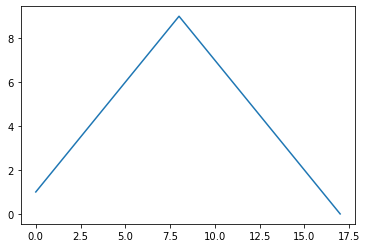

In [92]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

정말 초간단 그래프입니다. 보자마자 바로 이해가 될 것입니다. 이건 너무 단순해 보입니다. 그럼 numpy를 이용해 sin을 만들고 이것을 그려보겠습니다.

In [93]:
import numpy as np
t = np.arange(0,12,0.01)
y = np.sin(t)

np.arrange 명령은 0부터 12까지 0.01간격으로 데이터를 만들고 그 리스트를 np.sin에 입력하면 sin값이 나타납니다. 이 부분을 유심히 보면 좋습니다. 우리는 지금 t라는 시간 혹은 그래프상에서 x축을 의미하는 데이터를 0부터 12까지 만들고 그냥 사인 함수(np.sin)에 입력해서 그 출력을 y로 저장했습니다. 단 두줄, 단 두줄입니다. t는 값을 하나만 가진 변수가 아닙니다. 약 1200개 정도의 값을 가진 일종의 배열입니다. 그것을 반복문 없이 그냥 한 줄로 처리하는 것입니다. MATLAB 유저라면 익숙하겠지만 C에서 바로 넘어온 유저라면 놀라울 겁니다.

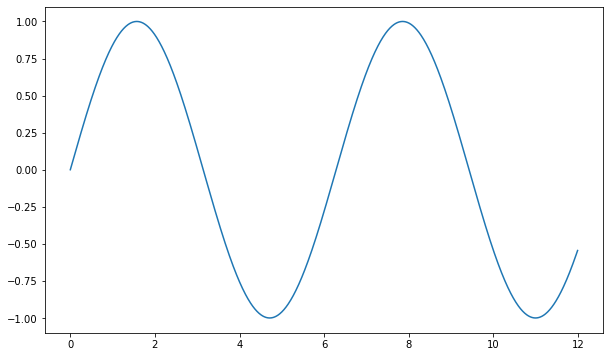

In [94]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.show()

처음과 비교해서 좀 더 낫습니다. 삼각함수 하나 그렸을 뿐인데 뿌듯합니다.

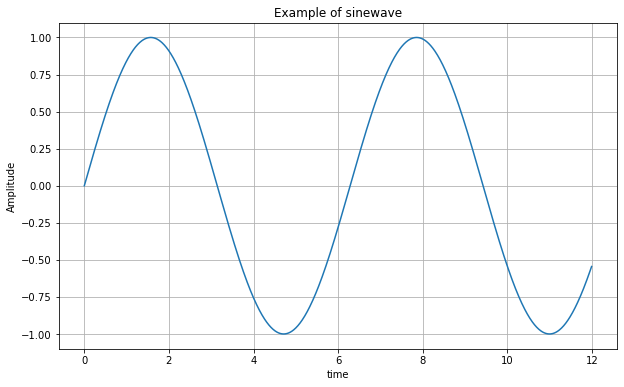

In [95]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

xlabel로 x축 라벨을, ylabel로 y축 라벨을, title 명령으로 제목을 정하고, 격자 무늬는 grid() 명령으로 만들 수 있습니다.

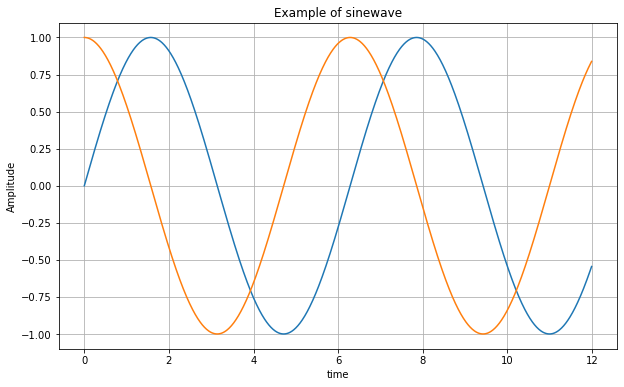

In [96]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

또 plot 명령을 두 개 넣어서 한 화면에 그래프를 두 개 만들 수 있습니다. 여기에 범례(legend)를 추가 하고 싶다면 plot을 그릴 때 label 옵션으로 텍스트를 잡아주고 plt.legend()라는 명령을 주면 됩니다.

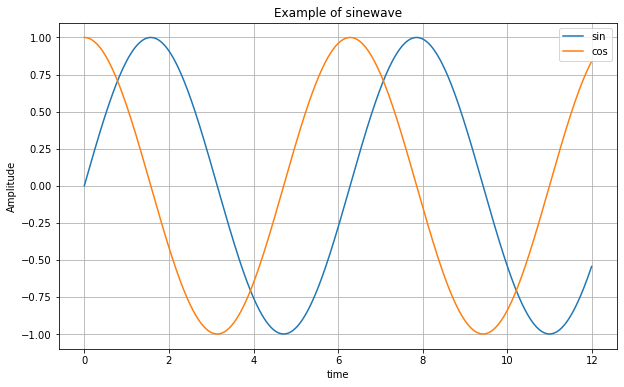

In [97]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

또한 lw옵션으로 선의 굵기를 지정할 수 있으며, color 옵션으로 색상을 지정할 수 있습니다.

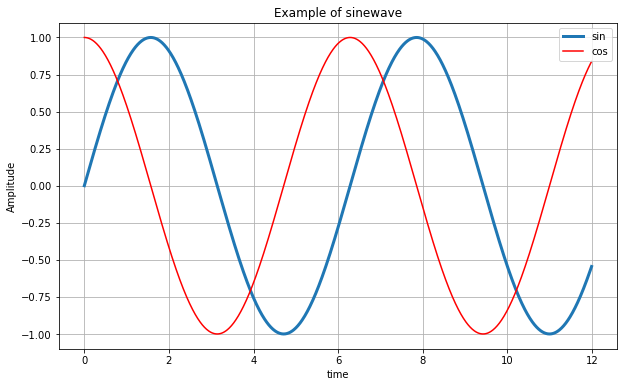

In [98]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

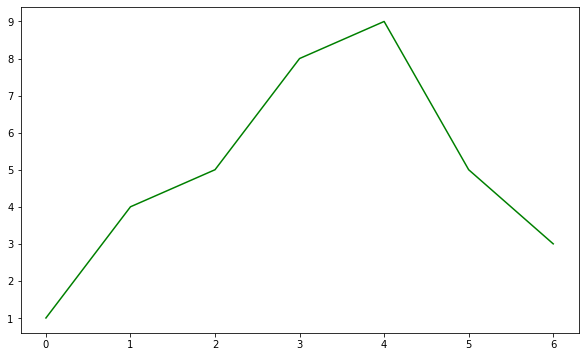

In [99]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

또 color='green'옵션으로 색상을 지정할 수도 있습니다.

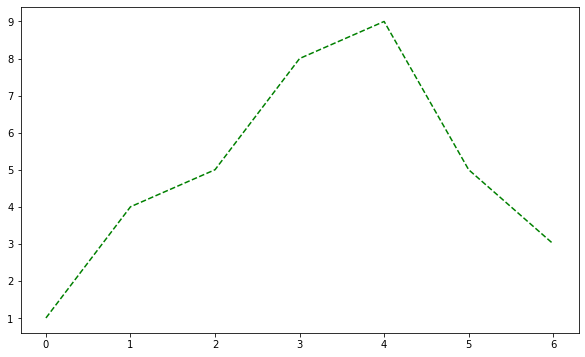

In [100]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

linestyle='dashed'옵션으로 선 스타일을 지정할 수 있습니다.

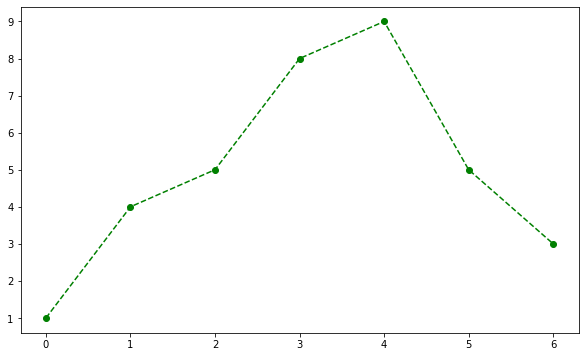

In [101]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

marker 옵션으로 데이터가 존재하는 곳에 마킹할 수 있습니다. 여기에 markerfaceolor 옵션과 markersize 옵션으로 마커의 크기와 색상을 지정할 수 있습니다.

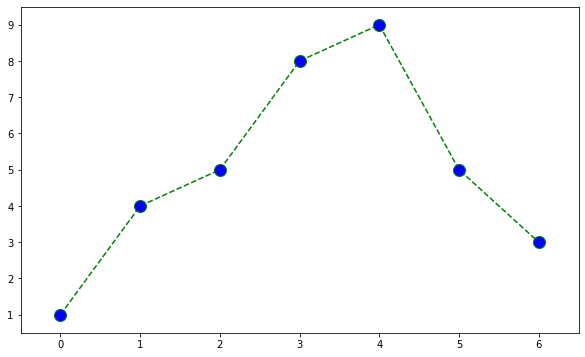

In [102]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o', markerfacecolor = 'blue', markersize=12 )
plt.xlim([-0.5,6.5])
plt.ylim([0.5,9.5])
plt.show()


선을 그리는 plt 명령 외에 scatter 명령도 있습니다.

In [103]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

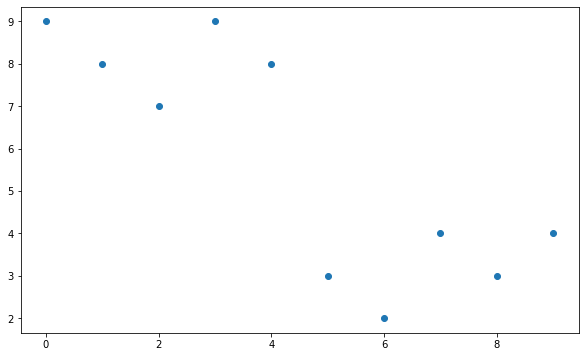

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

여기에  marker를 지정할 수 있습니다.

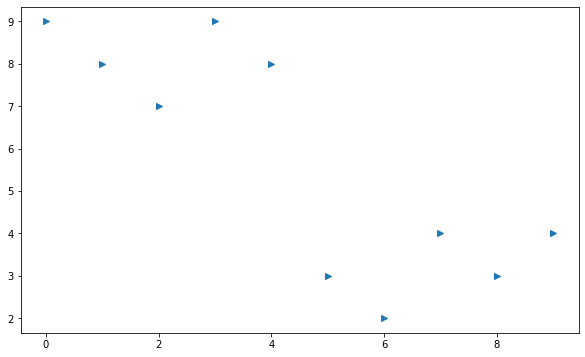

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

그리고 x축 값인 t에 따라 색상을 바꾸는 color map을 지정할 수 있습니다. 이때 s옵션은 마커의 크기입니다.

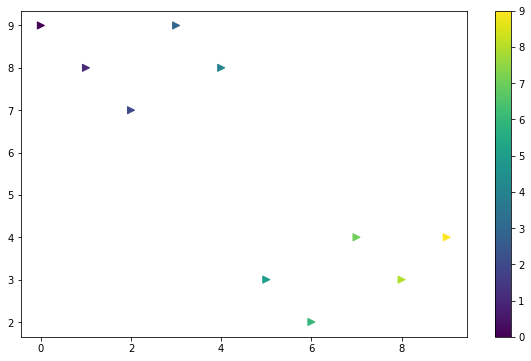

In [106]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s =50, c = colormap, marker='>')
plt.colorbar()
plt.show()

numpy의 랜덤변수 함수를 이용해서 데이터 세 개를 만들겠습니다. 이때 loc 옵션으로 평균값과 scale옵션으로 표준편차를 지정합니다.

In [107]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

이것을 그리면,

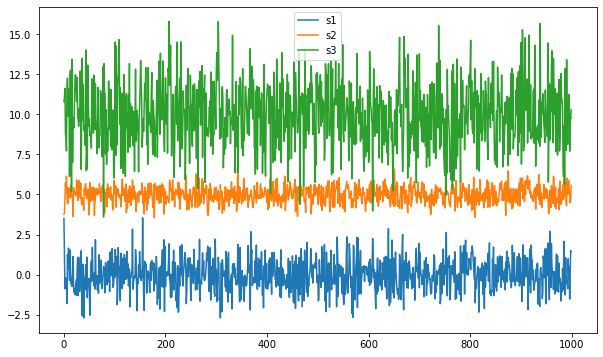

In [108]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

이렇게 됩니다. 이것을 boxplot으로 표현할 수 있습니다. boxplot의 정의는 조금 복잡하니 다시 언급할 기회가 있을 겁니다.

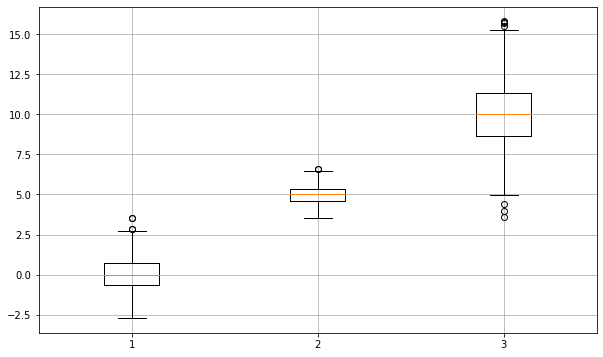

In [109]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

## 1-8 CCTV 현황 그래프로 분석하기
어마어마한 긴 길을 돌아서 드디어 CCTV 현황을 그래프로 분석하려고 합니다. 그러나 아직 하나가 남았습니다. 바로 한글 문제입니다. matplotlib이 기본으로 가진 폰트는 한글을 지원하지 않기 때문에 matplotlib의 폰트를 변경할 필요가 있습니다. 여러분 PC의 운영체제가 맥OS인지 윈도우인지를 모르니 둘다 배려해보겠습니다.

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


이제 너무 돌아와서 잊었을 수 있으니 다시 결과 변수인 data_result를 확인해보겠습니다.

In [141]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


pandas 데이터 뒤에 plot 명령을 붙이면 바로 그려줍니다.

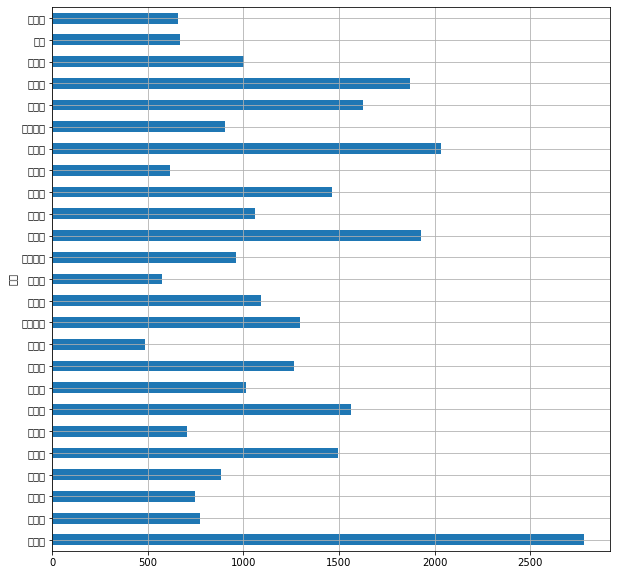

In [144]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

여기서는 kind='barh'로 지정해서 수평바로 그리도록 했습니다. grid=True로 grid를 그리라고 했고 figsize로 그림 크기도 지정했습니다. 그러나 figsize를 지정했어도 표현되는 곳이 웹 브라우저이기 때문에 항상 그 크기를 유지하는 것은 아닐 수 있습니다. 유저가 창의 크기를 줄이거나 하면 변하게 될 것입니다.

위 그림은 큰 의미를 찾기 어렵습니다. 사실 수평바 그래프는 데이터가 정렬되어 있을 때 좀 더 보기 좋습니다.

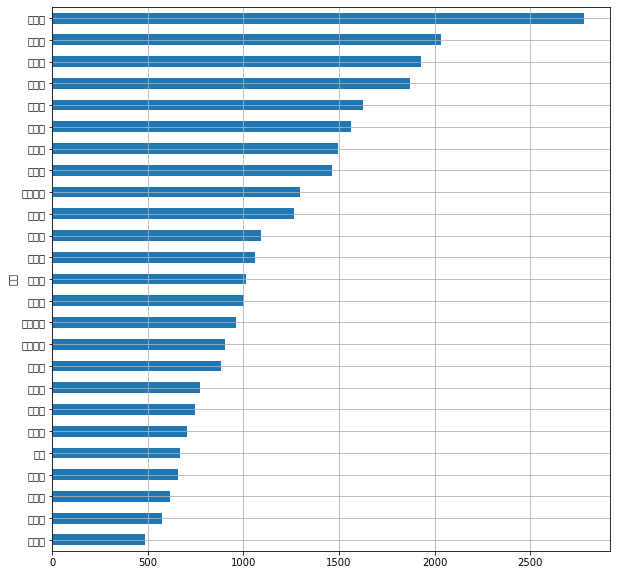

In [143]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

이렇게 정령(.sort_values)된 데이터에 수평바를 그린 결과를 보면 다음과 같습니다.

이제 보니 CCTV 개수에서는 강남구가 월등하다는 것을 알 수 있습니다. 그 뒤를 이어서 양천구,서초구,은평구가 꽤 많은 CCTV가 설치됐다는 것을 알 수 있습니다. 그리고 하위 그룹이 얼마나 적은 수의 CCTV를 가지고 있는지도 확인할 수 있습니다. 여기에 인구 대비 CCTV 비율을 계산해서 정렬하고 그려보겠습니다.

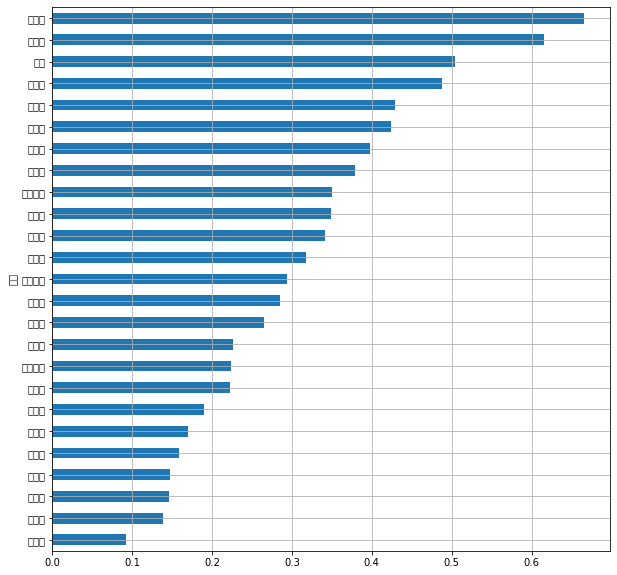

In [126]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

이렇게 실행하면 다음과 같은 그래프를 볼 수 있습니다.

인구 대비 CCTV 수를 보니 이번에는 용산구와 종로구가 월등이 높습니다. 그런데 송파구는 인구대비로 봐도 CCTV 비율이 낮습니다. 일단 이 정도만 하더라도 어느 정도 시각화 효과는 보입니다. 스스로를 돌아보면 우리가 이 책의 겨우 시작 지점이라는 것을 알고 있다면 더더욱 그렇습니다. 그래서 조금 더 나가보겠습니다. scatter 함수를 사용하는 겁니다. 그리고 s=50로 마커의 크기를 잡고 그려보겠습니다.

/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


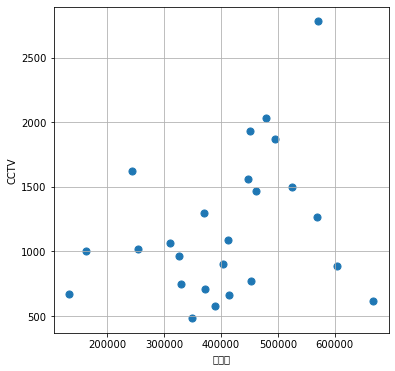

In [127]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

이제 저 데이터를 대표하는 직선을 하나 그리려고 합니다. 어차피 이전 절에서 CCTV와 인구수는 양의 상관관계가 있다고 봤으니까요.

In [128]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [129]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

여기서 numpy의 polyfit 명령으로 손쉽게 직선을 만들 수 있습니다. 그리고 이를 그리기 위해 x축과 y축 데이터를 얻어야 하는데, x축 데이터는 numpy의 linspace로 만들고, y축은 polyld로 만들 수 있습니다.

/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203

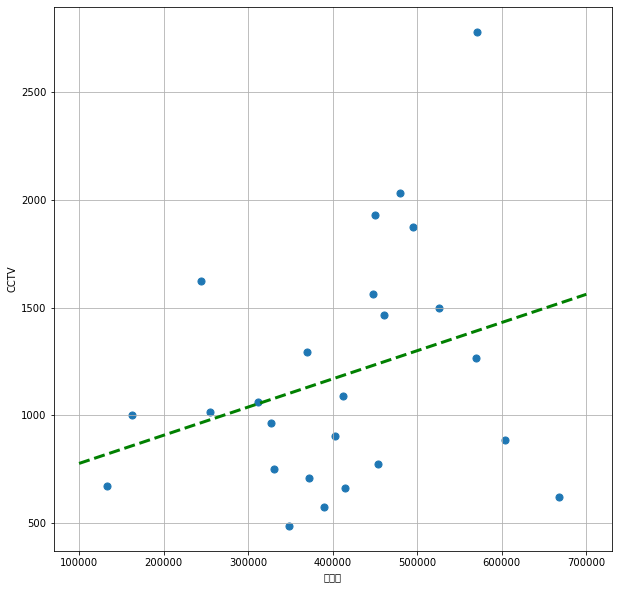

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

여기서 두 가지 장치를 넣고 싶습니다. 하나는 직선이 이 전체 데이터의 대표 값 역할을 한다면, 즉 인구수가 300000일 때는 CCTV는 1100 정도여야 한다는 개념을 이야기하는 거라면 그 경향에서 멀리있는 구는 이름이 같이 나타나도록 하고 싶다는 것과 직선에서 멀어질수록 다른 색을 나타내도록 하고 싶다는 것입니다.<br>
그래서 오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬해서 다시 저장했습니다.

In [131]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


이제 텍스트와  color map을 입히겠습니다.

/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

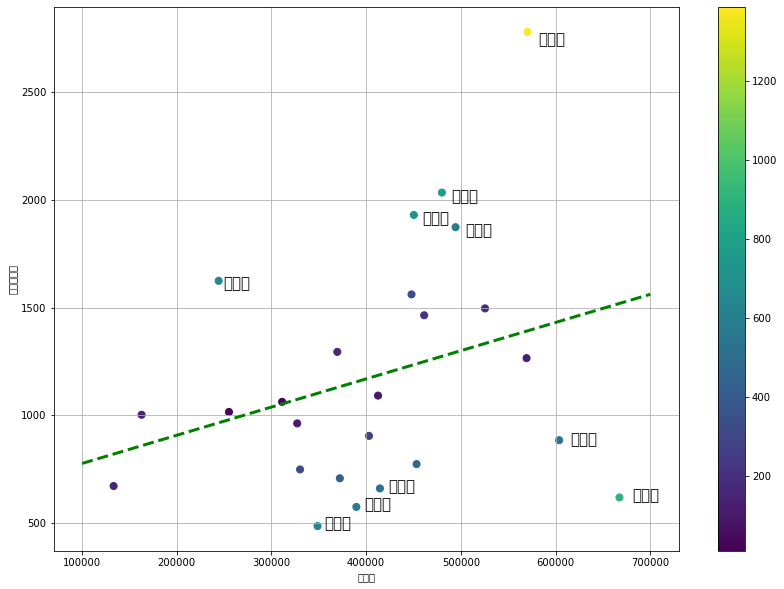

In [133]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

일단 직선을 기준으로 위에 있는 '강남구','양천구','서초구','은평구','용산구'는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역입니다. 그리고 '송파구','강서구','중랑구','마포구','도봉구'는 일반적인 경향보다 CCTV가 적게 설치된 지역입니다. 특히'강남구'는 월등히 많은 CCTV가 설치됐지만,'송파구'는 인구수에 비해 너무나도 적은 수의 CCTV를 가지고 있습니다.<br>
이제 1장을 마쳤습니다. 여기까지 따라왔다면 여러분은 벌써 어마어마한 경험을 한 것입니다. 파이썬을 이용해서 데이터를 핸들링하고(그것도 고급형으로)시각화까지 했습니다. 특히'송파구'가 인구대비 다른 구와도 비교적 적은 수의CCTV를 가지고 있다는 것을 시각화까지 수행했습니다.

## 출처 : "파이썬으로 데이터 주무르기"